# Массивы

In [2]:
import numpy

In [9]:
a = numpy.zeros((2, 3), dtype=numpy.float32)  # ничего не вывело

In [10]:
a  # выведет а, по оси Y левая координата (внешняя), по оси X правая (внутренняя) 

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [6]:
a;  # не выведет а

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [11]:
type(a)

numpy.ndarray

In [12]:
a.__class__

numpy.ndarray

In [16]:
a = numpy.zeros((2, 3, 4), dtype=numpy.float32); a  # выведет новый а, по оси X правая координата, по оси Y -- внешние координаты

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [17]:
a += 1
display(a)
a *=2
display(a)  # сложение со скаляром, умножение на скаляр; display -- вывод с помощью jupyter (colab)

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)

array([[[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]], dtype=float32)

In [22]:
# *shape поигимает любое количество аргументов arrgs
ones = lambda *shape: numpy.ones(shape, dtype=numpy.float32)

In [23]:
ones(3, 3)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

# Задача

In [62]:
"""
Задача: 
вывести красиво операцию A + B = C на экран
"""

my_input = [ones(2, 3), '+', ones(2, 3), '=', ones(2,3) * 2]
print(my_input)
print(*my_input)
display(*my_input)

[array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32), '+', array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32), '=', array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)]
[[1. 1. 1.]
 [1. 1. 1.]] + [[1. 1. 1.]
 [1. 1. 1.]] = [[2. 2. 2.]
 [2. 2. 2.]]


array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

'+'

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

'='

array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [25]:
# пусть наша функция имеет такой формат:
def pp(*lst):
    pass
pp(*my_input)

In [36]:
lines = [repr(a).split('\n') for a in my_input]
lines

[['array([[1., 1., 1.],', '       [1., 1., 1.]], dtype=float32)'],
 ["'+'"],
 ['array([[1., 1., 1.],', '       [1., 1., 1.]], dtype=float32)'],
 ["'='"],
 ['array([[2., 2., 2.],', '       [2., 2., 2.]], dtype=float32)']]

In [37]:
lines = [str(a).split('\n') for a in my_input]
lines

[['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['+'],
 ['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['='],
 ['[[2. 2. 2.]', ' [2. 2. 2.]]']]

In [38]:
max_lines = max([len(line) for line in lines])
max_lines

2

In [39]:
lines = [line + [''] * (max_lines - len(line)) for line in lines]
lines

[['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['+', ''],
 ['[[1. 1. 1.]', ' [1. 1. 1.]]'],
 ['=', ''],
 ['[[2. 2. 2.]', ' [2. 2. 2.]]']]

### транспонирование, reshape, операция получения максимума

In [40]:
lines_arr = numpy.array(lines)
lines_arr.T

array([['[[1. 1. 1.]', '+', '[[1. 1. 1.]', '=', '[[2. 2. 2.]'],
       [' [1. 1. 1.]]', '', ' [1. 1. 1.]]', '', ' [2. 2. 2.]]']],
      dtype='<U12')

In [41]:
widths = [len(x) for x in lines]
display(widths)

[2, 2, 2, 2, 2]

In [44]:
lines_arr.shape
lines_arr.flatten().shape

(10,)

In [45]:
widths = numpy.array([len(x) for x in lines_arr.flatten()])
display(widths)

widths = widths.reshape(len(lines_arr), -1)
display(widths)

array([11, 12,  1,  0, 11, 12,  1,  0, 11, 12])

array([[11, 12],
       [ 1,  0],
       [11, 12],
       [ 1,  0],
       [11, 12]])

In [46]:
widths = widths.reshape(*lines_arr.shape)
display(widths)

array([[11, 12],
       [ 1,  0],
       [11, 12],
       [ 1,  0],
       [11, 12]])

In [48]:
numpy.max(widths)

12

In [47]:
widths

array([[11, 12],
       [ 1,  0],
       [11, 12],
       [ 1,  0],
       [11, 12]])

In [49]:
widths.max()

12

In [51]:
widths.max(axis=1)  # складывает по внутренней оси, 

array([12,  1, 12,  1, 12])

In [50]:
line_widths = widths.max(axis=1)

### форматирование всё равно придётся делать поэлементно. зашли в тупик...

In [52]:
lines = [str(a).split('\n') for a in my_input]
max_lines = max([len(line) for line in lines])
max_lines

2

In [64]:
def fmt_item(lines, max_lines=0):
    max_width = max([len(line) for line in lines])
    empty = ' ' * max_width
    lines = [line.ljust(max_width) for line in lines]
    lines += [empty] * (max_lines - len(lines))
    return lines    
    
results = fmt_item(str(numpy.arange(1, 5).reshape(2, -1)).split('\n'), max_lines=3)
print('\n'.join(results))

[[1 2] 
 [3 4]]
       


In [0]:
# а что делать дальше, когда у нас есть такие массивы? 
# воспользуемся array().T

In [68]:
def pp(*lst):
    lines = [str(item).split('\n') for item in lst]
    max_lines = max([len(item) for item in lines])
    
    lines = [fmt_item(item, max_lines=max_lines) for item in lines]
    lines_t = numpy.array(lines).T
    print('\n'.join([' '.join(line) for line in lines_t]))
    
pp(*my_input)

[[1. 1. 1.]  + [[1. 1. 1.]  = [[2. 2. 2.] 
 [1. 1. 1.]]    [1. 1. 1.]]    [2. 2. 2.]]


### Попробуем нашу функцию:

In [69]:
A = numpy.arange(1, 11).reshape(5,2)
B = numpy.linspace(10, 30, 10).reshape(5,2)
R = A * B
pp(A, '*', B, '=', R)

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [14.44444444 16.66666667]     [ 43.33333333  66.66666667] 
 [ 5  6]     [18.88888889 21.11111111]     [ 94.44444444 126.66666667] 
 [ 7  8]     [23.33333333 25.55555556]     [163.33333333 204.44444444] 
 [ 9 10]]    [27.77777778 30.        ]]    [250.         300.        ]]


In [0]:
import operator
#operator.add = lambda x, y: x + y

def op(x, name, y, func):
    r = func(x, y)
    pp(x, name, y, '=', r)
    
op(numpy.array([[1,2], [3,4]]), '+', numpy.array([[5,6],[7,8]]), operator.add)

[[1 2]  + [[5 6]  = [[ 6  8] 
 [3 4]]    [7 8]]    [10 12]]


In [70]:
# вспомним классы, оформим в виде класса
class Op:
    def __init__(self, name, func):
        self.name = name
        self.func = func
    
    def __call__(self, x, y):
        r = self.func(x, y)
        pp(x, self.name, y, '=', r)

SSum = Op('+', lambda x, y: x + y)
SMul = Op('*', lambda x, y: x * y)
MMul = Op('@', lambda x, y: x @ y)  # python 3.5+ 

SMul(A, B)

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [14.44444444 16.66666667]     [ 43.33333333  66.66666667] 
 [ 5  6]     [18.88888889 21.11111111]     [ 94.44444444 126.66666667] 
 [ 7  8]     [23.33333333 25.55555556]     [163.33333333 204.44444444] 
 [ 9 10]]    [27.77777778 30.        ]]    [250.         300.        ]]


In [71]:
MMul(A.T, B)

[[ 1  3  5  7  9]  @ [[10.         12.22222222]  = [[561.11111111 616.66666667] 
 [ 2  4  6  8 10]]    [14.44444444 16.66666667]     [655.55555556 722.22222222]]
                      [18.88888889 21.11111111]                                 
                      [23.33333333 25.55555556]                                 
                      [27.77777778 30.        ]]                                


# Простая индексация

In [72]:
pp(B[0, :], B[-1,-2], B[-2:-1, 0])

[10.         12.22222222] 27.77777777777778 [23.33333333]


# Broadcasting и stack

In [73]:
SSum(A, B[0])  # что произойдёт? это преобразование называется broadcasting

[[ 1  2]  + [10.         12.22222222] = [[11.         14.22222222] 
 [ 3  4]                                 [13.         16.22222222] 
 [ 5  6]                                 [15.         18.22222222] 
 [ 7  8]                                 [17.         20.22222222] 
 [ 9 10]]                                [19.         22.22222222]]


In [74]:
SMul(A, B[0])  # смотрим ещё раз, на умножении

[[ 1  2]  * [10.         12.22222222] = [[ 10.          24.44444444] 
 [ 3  4]                                 [ 30.          48.88888889] 
 [ 5  6]                                 [ 50.          73.33333333] 
 [ 7  8]                                 [ 70.          97.77777778] 
 [ 9 10]]                                [ 90.         122.22222222]]


In [75]:
SMul(A, numpy.stack(list(B[0:1]) * 5))

[[ 1  2]  * [[10.         12.22222222]  = [[ 10.          24.44444444] 
 [ 3  4]     [10.         12.22222222]     [ 30.          48.88888889] 
 [ 5  6]     [10.         12.22222222]     [ 50.          73.33333333] 
 [ 7  8]     [10.         12.22222222]     [ 70.          97.77777778] 
 [ 9 10]]    [10.         12.22222222]]    [ 90.         122.22222222]]


# Бинарные и логические операции с массивами

In [76]:
pp(A, A>3, B, B>=10.) # сравнение float -- дело неточное

[[ 1  2]  [[False False]  [[10.         12.22222222]  [[ True  True] 
 [ 3  4]   [False  True]   [14.44444444 16.66666667]   [ True  True] 
 [ 5  6]   [ True  True]   [18.88888889 21.11111111]   [ True  True] 
 [ 7  8]   [ True  True]   [23.33333333 25.55555556]   [ True  True] 
 [ 9 10]]  [ True  True]]  [27.77777778 30.        ]]  [ True  True]]


In [82]:
1<<23

8388608

Float 32 format: ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/1180px-Float_example.svg.png) 

In [84]:
pp(numpy.isclose(B, 10), (10 - 1e-7 <= B) & (B <= 10 + 1e-7))

[[ True False]  [[ True False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]]  [False False]]


In [85]:
idx = numpy.isclose(B, 10) | numpy.isclose(B, 30)
B[idx]

array([10., 30.])

# Индексация массивов

In [86]:
pp(B)
pp(numpy.isclose(B[1:-1, 1:-1], 10))  # классическая индексация питона
pp(numpy.isclose(B[0], 10))   # берём первую строку
pp(numpy.isclose(B[:, 1], 10))   # берём второй столбец

[[10.         12.22222222] 
 [14.44444444 16.66666667] 
 [18.88888889 21.11111111] 
 [23.33333333 25.55555556] 
 [27.77777778 30.        ]]
[]
[ True False]
[False False False False False]


# Cлучайные значения

In [88]:
"""
uniform - случайное число между
randn - матрица с нормальным распределением
rand - матрица от 0 до 1
"""
pp(numpy.random.uniform(0, 1), numpy.random.randn(2, 3), numpy.random.rand(2, 3))

0.6336482349262754 [[-0.01002595  1.67080819 -0.66437971]  [[0.08833981 0.68535982 0.95339335] 
                    [-0.60555494 -0.65099088  0.51256776]]  [0.00394827 0.51219226 0.81262096]]


In [89]:
import random

numpy.random.seed(10)
nr = numpy.random.uniform(0, 1)
nr2 = numpy.random.uniform(0, 1)

random.seed(10)
rr = random.uniform(0, 1)
rr2 = random.uniform(0, 1)

pp(rr, nr, rr2, nr2)

random.seed(10)
numpy.random.seed(10)
rr = random.uniform(0, 1)
nr = numpy.random.uniform(0, 1)
rr2 = random.uniform(0, 1)
nr2 = numpy.random.uniform(0, 1)

pp(rr, nr, rr2, nr2)

0.5714025946899135 0.771320643266746 0.4288890546751146 0.0207519493594015
0.5714025946899135 0.771320643266746 0.4288890546751146 0.0207519493594015


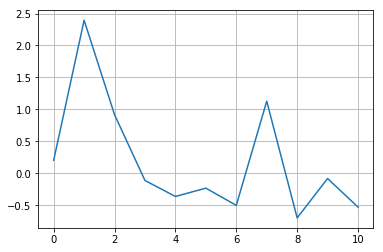

In [95]:
import matplotlib
# значение по умолчанию в colab, но не в локальных ноутбуках
matplotlib.rcParams['axes.grid'] = True

import matplotlib.pyplot as plt
# нарисуем график для 11 случайных нормально распределённых чисел.
x = numpy.linspace(0, 10, 11)
dots = numpy.random.randn(11)
plt.plot(x, dots);

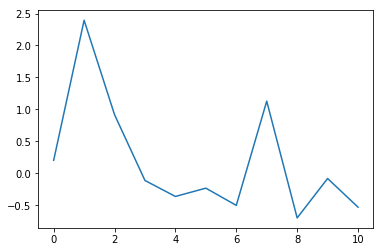

In [97]:
import matplotlib
matplotlib.rcParams['axes.grid'] = False  # убираем белую клетку (настройки colab)

import matplotlib.pyplot as plt
plt.plot(x, dots);  # рисуем линию ещё раз

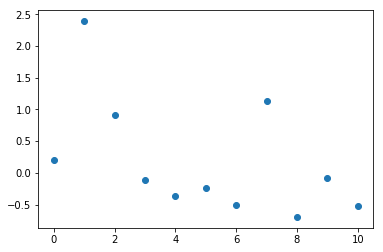

In [98]:
# если надо просто вывести точки, без линий между ними
plt.scatter(x, dots);

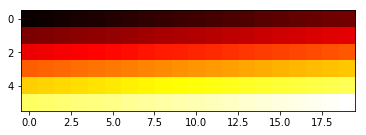

In [99]:
# выводим двумерный массив, используя цветовую схему 'hot'.
# matplotlib автоматически определяет минимум и максимум
# по нему настраивает цвета
plt.imshow(numpy.arange(0, 120).reshape(6, 20), 'hot');

# Строки и словари

In [100]:
# Задача: определить, какой символ встречается чаще всего в данном тексте,
# не считая пробелов!
a = "Кот сидел на крыше тише мыши"
pp(set(list(a)))

{' ', 'и', 'ы', 'о', 'н', 'ш', 'а', 'е', 'с', 'л', 'К', 'т', 'к', 'м', 'д', 'р'}


In [101]:
from collections import Counter
# приближённое решение.
Counter(list(a)).most_common()
# убрать пробел и будет то, что надо. попробуйте сами.

[(' ', 5),
 ('и', 3),
 ('е', 3),
 ('ш', 3),
 ('т', 2),
 ('ы', 2),
 ('К', 1),
 ('о', 1),
 ('с', 1),
 ('д', 1),
 ('л', 1),
 ('н', 1),
 ('а', 1),
 ('к', 1),
 ('р', 1),
 ('м', 1)]

In [102]:
# напишем вручную код аналогичный тому, что происходит внутри Counter
counter = {}
for ch in list(a.lower()):
    if ch == ' ': 
        continue

    if ch in counter:
        counter[ch] += 1
    else:
        counter[ch] = 1
    
pp(counter)

{'к': 2, 'о': 1, 'т': 2, 'с': 1, 'и': 3, 'д': 1, 'е': 3, 'л': 1, 'н': 1, 'а': 1, 'р': 1, 'ы': 2, 'ш': 3, 'м': 1}


In [103]:
pp(type(ch))  # в питоне даже отдельные символы -- это строчки

<class 'str'>


In [104]:
max(counter.values())  # нашли максимум

3

In [105]:
# алгоритм для поиска максимума
winner_ch = None
winner_count = 0
for ch, count in counter.items():
  if count > winner_count:
      winner_count = count
      winner_ch = ch
    
print(winner_ch, winner_count)  # и вот наш символ-победитель
# имейте в виду, победителя на самом деле три.
# исправьте код, чтобы вывести и второй и третий.

и 3
